In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
data_folder = "data"
test_path = os.path.join(data_folder, "test.csv")
train_path = os.path.join(data_folder, "train.csv")

# test_df: pd.DataFrame = pd.read_csv(test_path).drop("Id", axis=1)
# train_df: pd.DataFrame = pd.read_csv(train_path).drop("Id", axis=1)
test_df: pd.DataFrame = pd.read_csv(test_path)
train_df: pd.DataFrame = pd.read_csv(train_path)

In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Analysing 'SalePrice'

In [4]:
# descriptive statistics summary
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Figure size 1296x576 with 0 Axes>

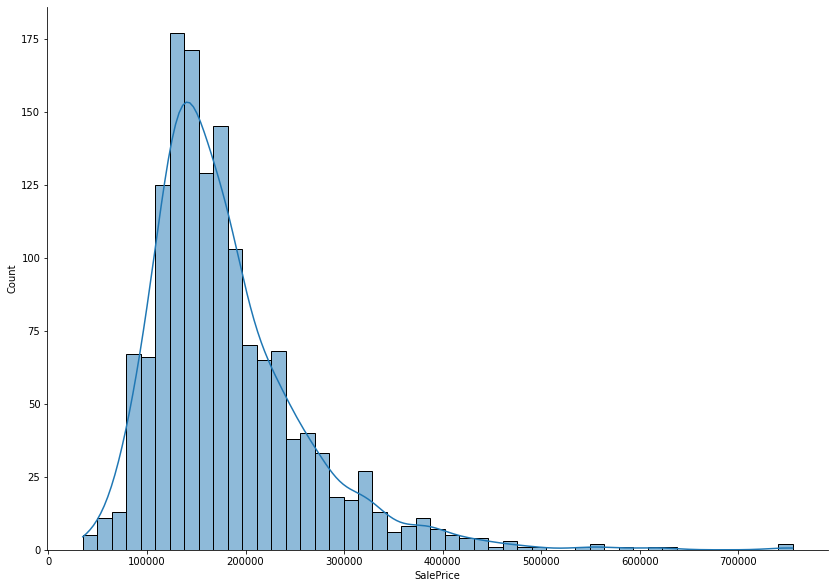

In [5]:
plt.figure(figsize=(18, 8))
sns.displot(train_df['SalePrice'], kde=True, height=8.27, aspect=11.7/8.27)

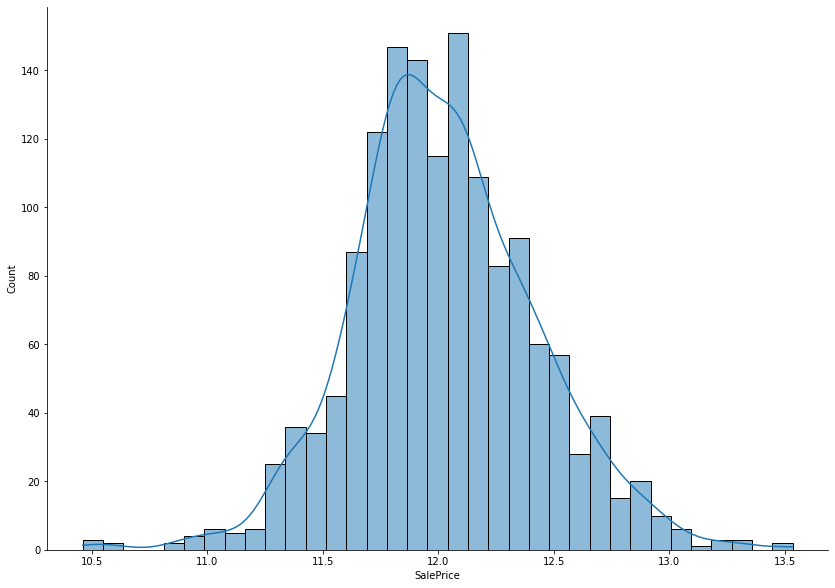

In [6]:
sns.displot(np.log(train_df['SalePrice']), kde=True, height=8.27, aspect=11.7/8.27)

In [7]:
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


# Relationship with numerical variables

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

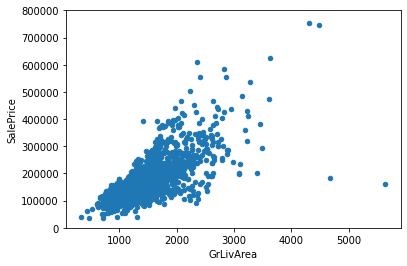

In [8]:
# Above grade (ground) living area square feet
var = "GrLivArea"
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

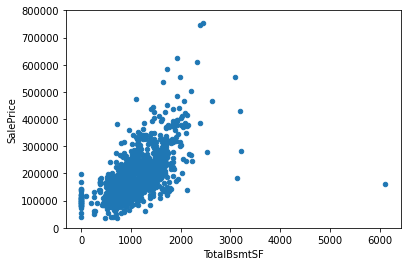

In [9]:
# Total square feet of basement area
var = "TotalBsmtSF"
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

# Relationship with categorical features

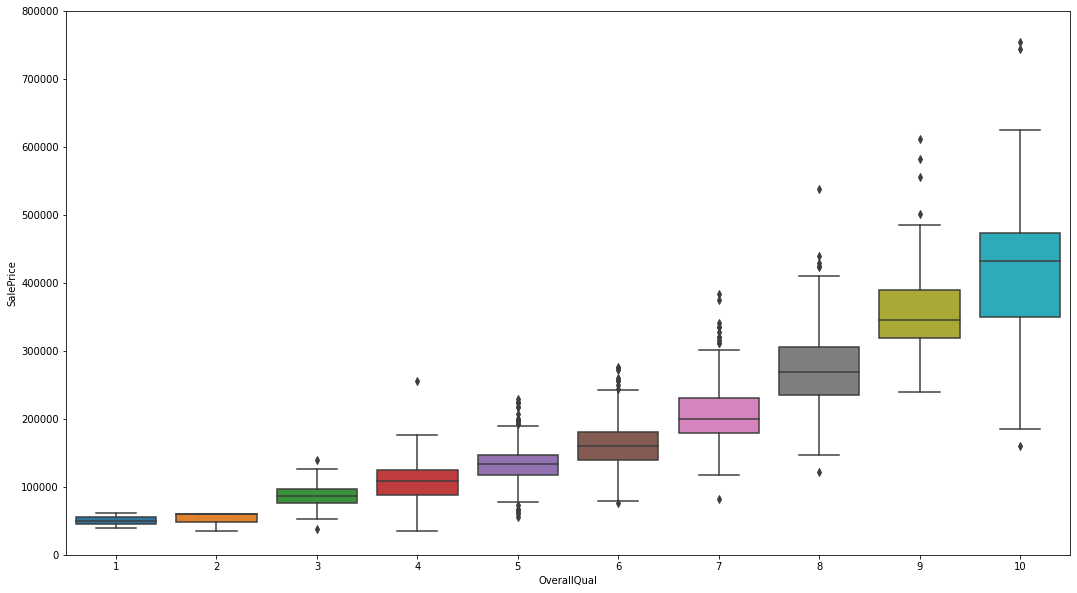

In [10]:
# Rates the overall material and finish of the house
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 10))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

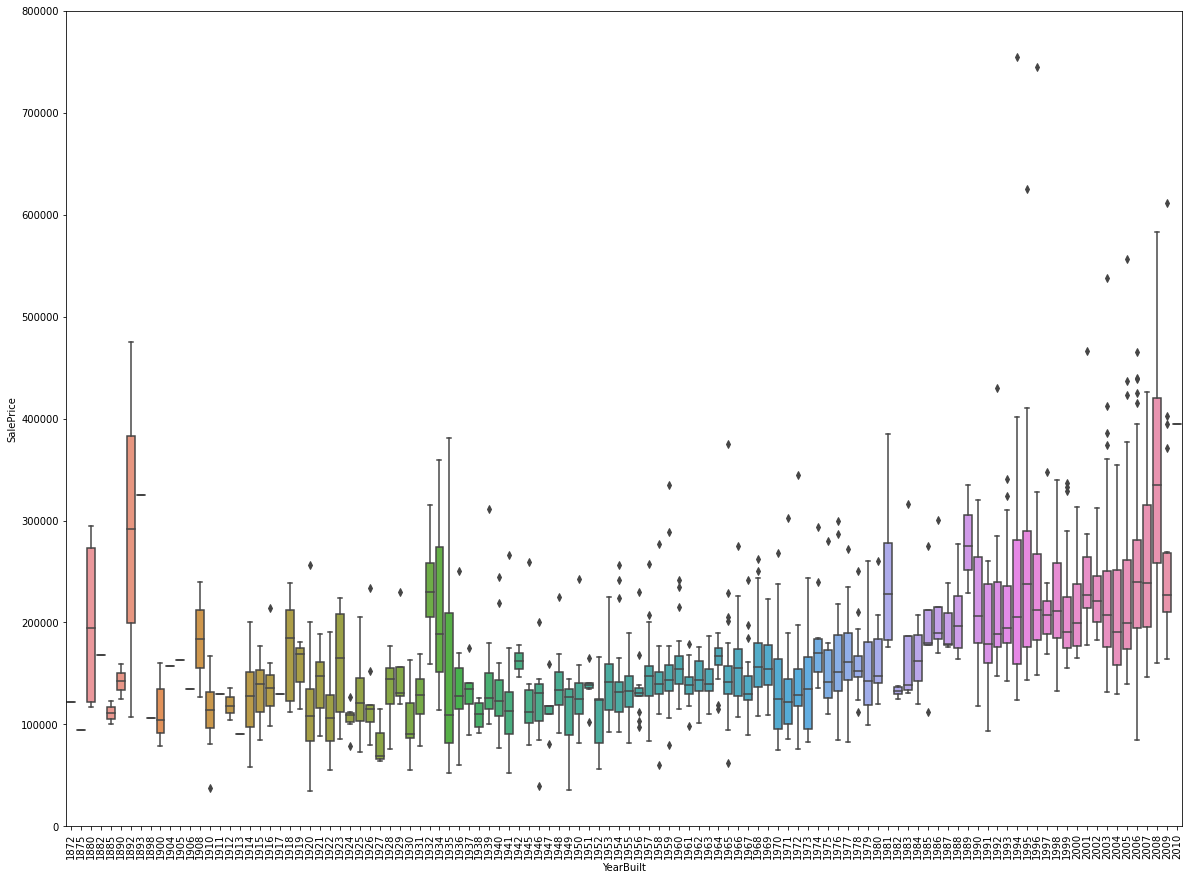

In [11]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 15))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

# Correlation matrix

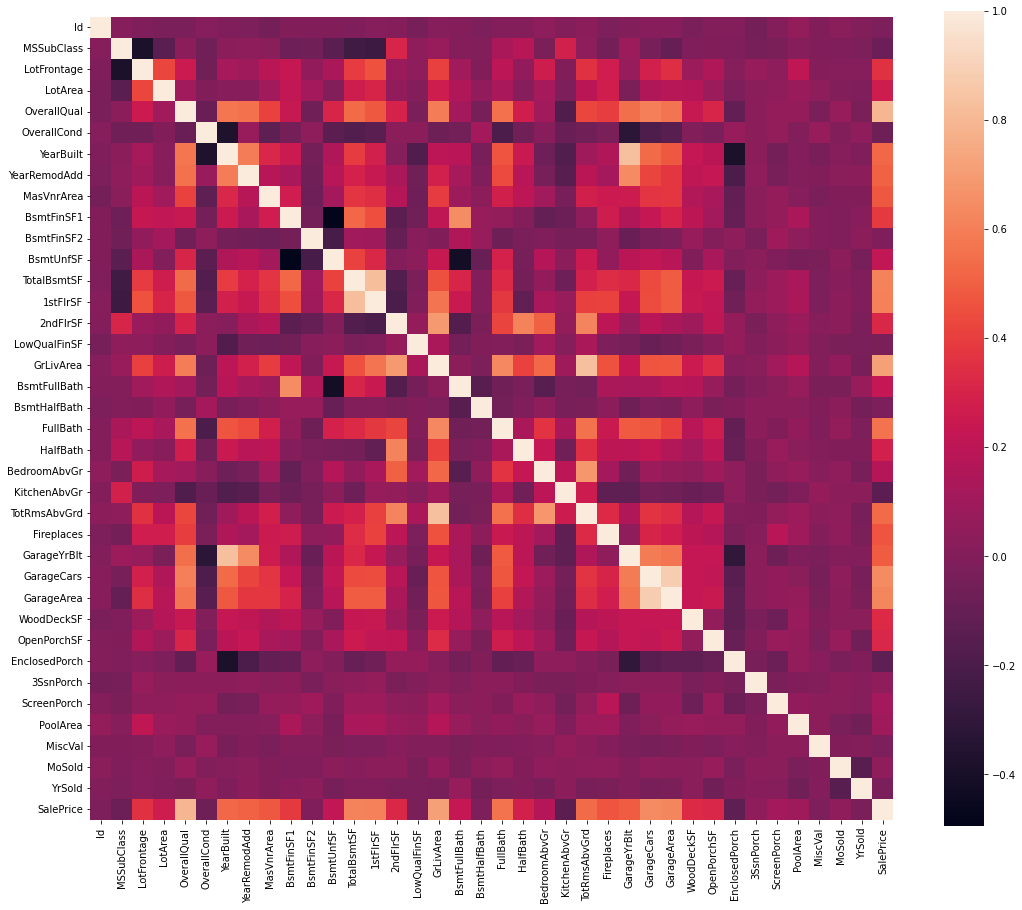

In [12]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corrmat, vmax=1.0, square=True);

# 'SalePrice' correlation matrix

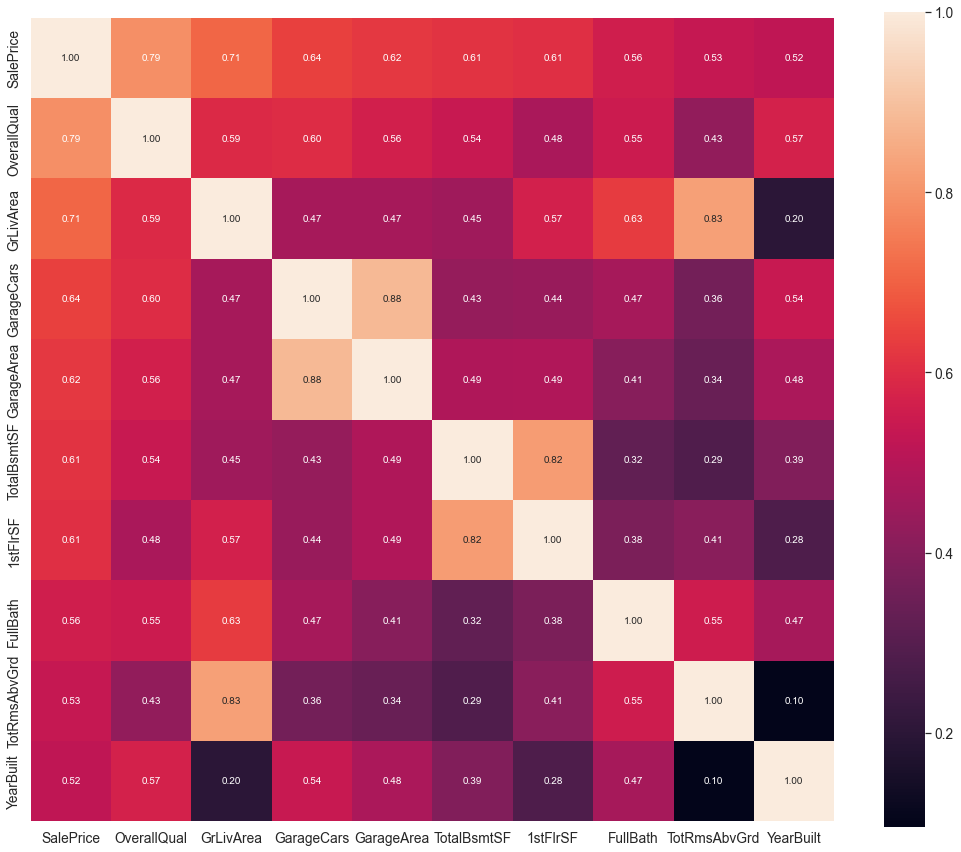

In [13]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(18, 15))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Scatter plots between 'SalePrice' and correlated variables

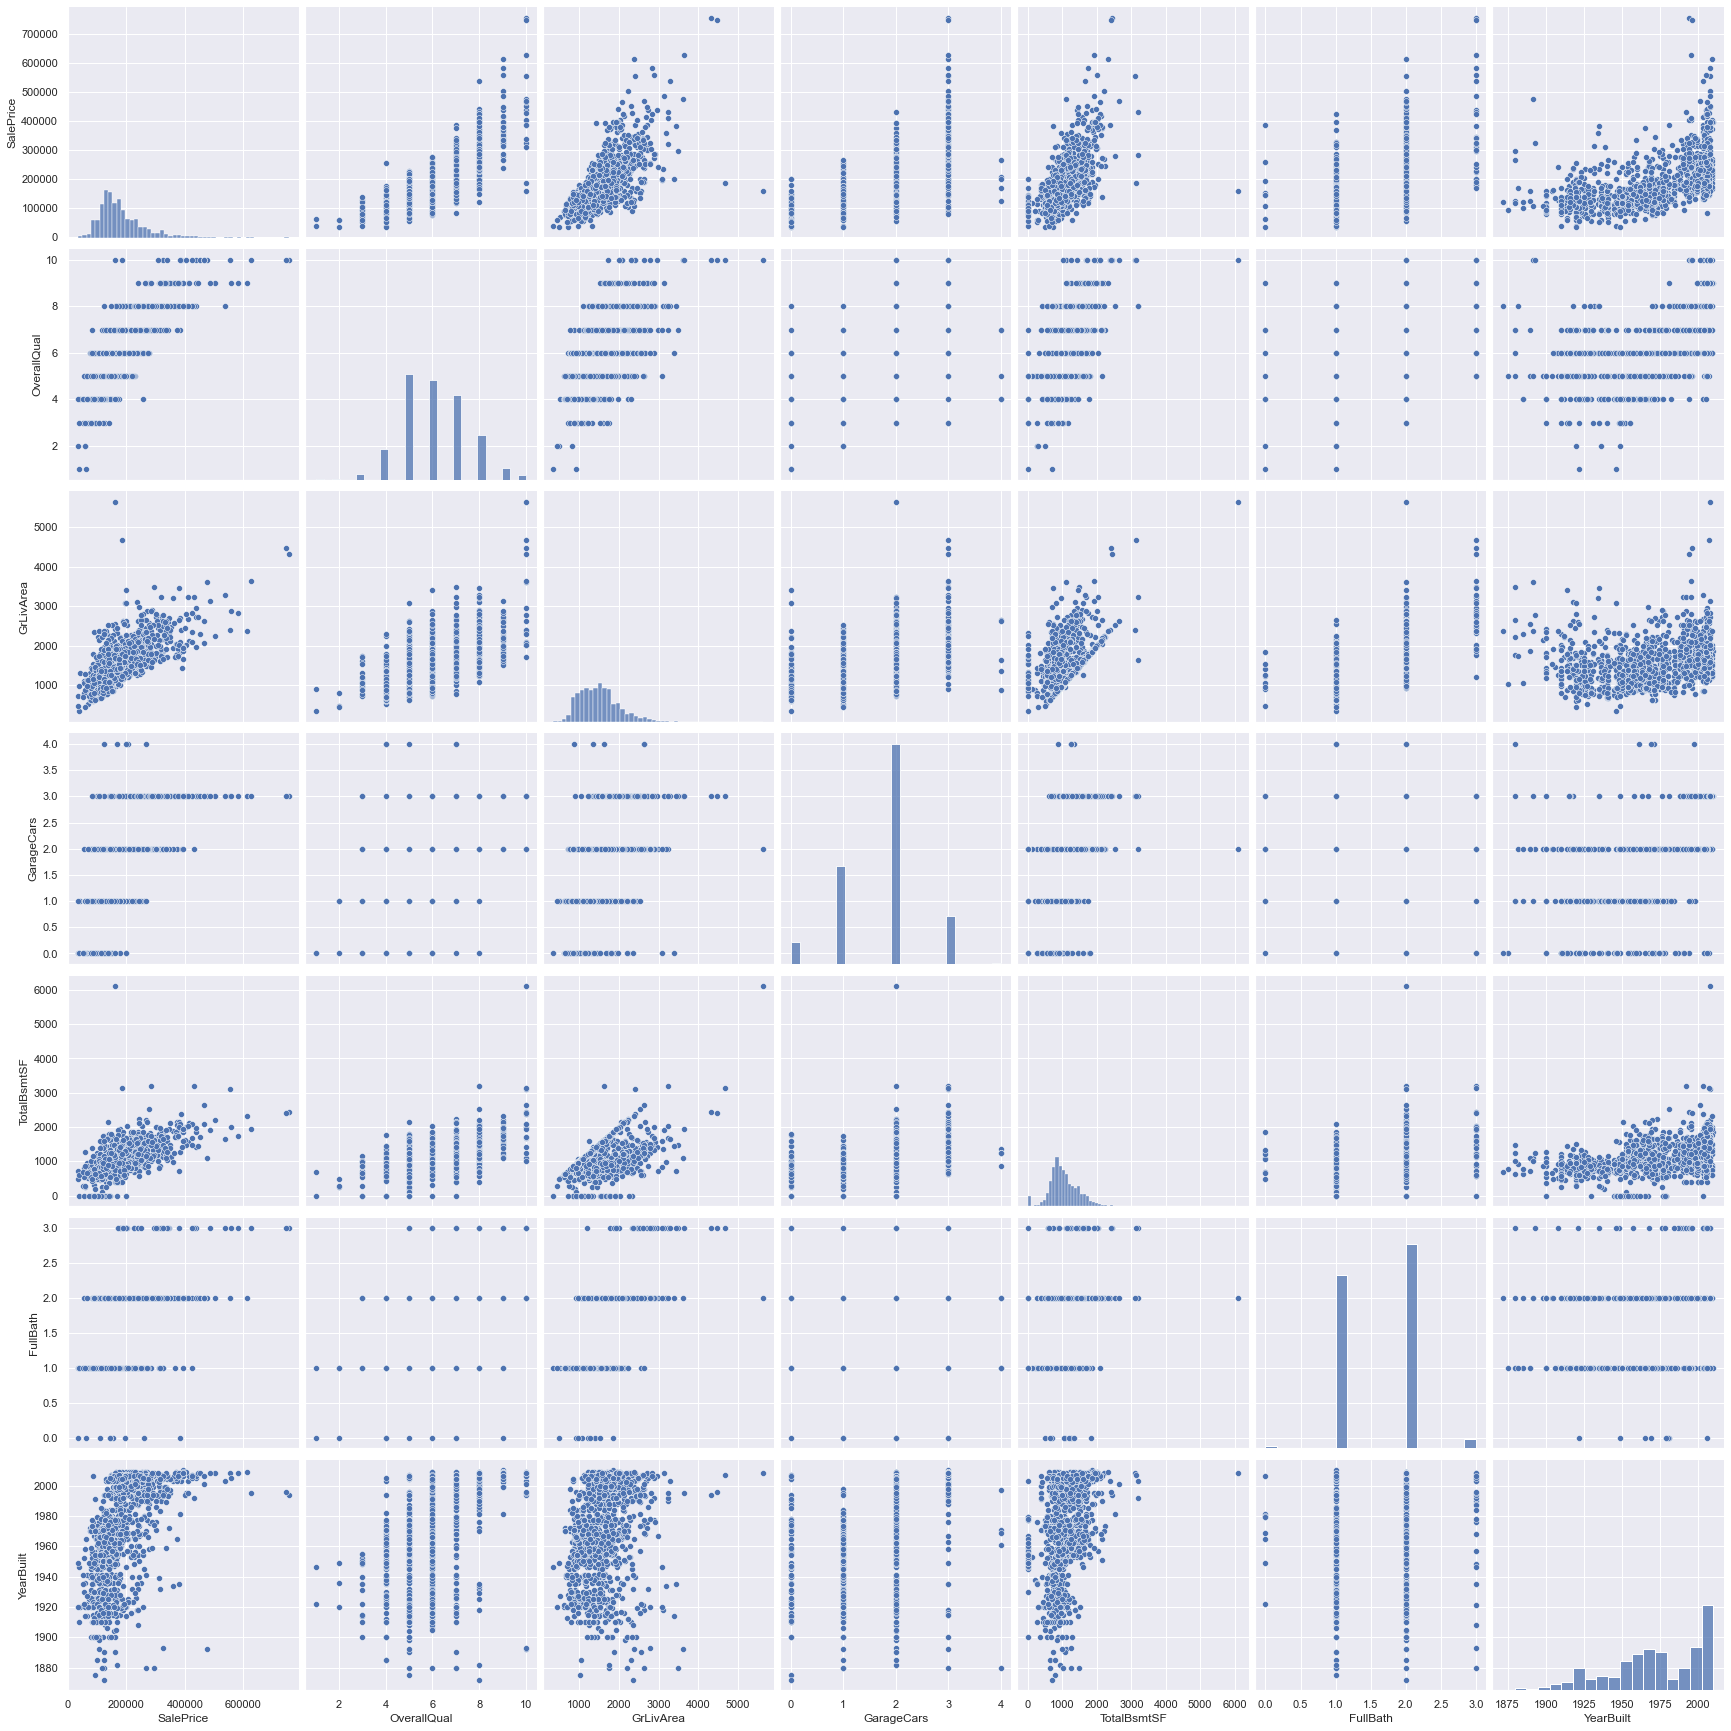

In [14]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], height=3.5)
plt.show();

# Missing data

In [15]:
total_missing = train_df.isnull().sum().sort_values(ascending=False)
whole_data_count = train_df.isnull().count()
missing_persent = (total_missing / whole_data_count).sort_values(ascending=False)

total_missing = total_missing[total_missing > 0]
missing_persent = missing_persent[missing_persent > 0]

missing_data = pd.concat([total_missing, missing_persent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [16]:
# deleating with missing data
deleted_labels = missing_data[missing_data['Total'] > 1].index
train_df = train_df.drop(labels=deleted_labels, axis=1)

columns_to_be_cleaned = train_df.loc[train_df['Electrical'].isnull()].index
train_df = train_df.drop(labels=columns_to_be_cleaned)
train_df.isnull().sum().max() # check

0

# Outliners

In [17]:
from sklearn.preprocessing import StandardScaler

saleprice_scaled = StandardScaler().fit_transform(train_df['SalePrice'].values[:, np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

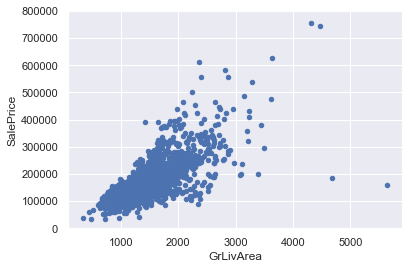

In [18]:
var = "GrLivArea"
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

In [23]:
train_df.sort_values(by = 'GrLivArea', ascending = False)[:2]
train_df = train_df.drop(train_df[train_df['Id'] == 1299].index)
train_df = train_df.drop(train_df[train_df['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

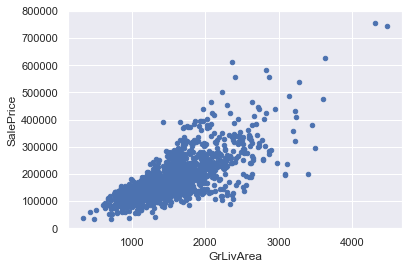

In [24]:
var = "GrLivArea"
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0, 800000))

# Data transformation

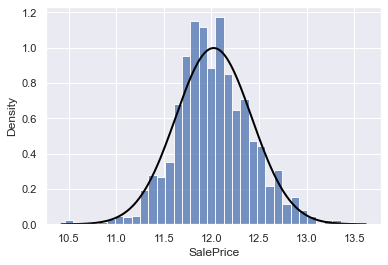

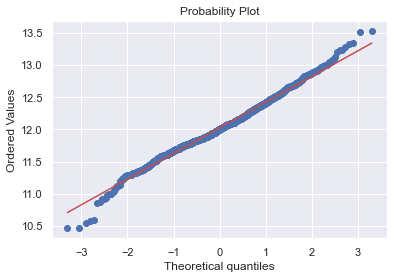

In [47]:
from scipy.stats import norm
from scipy import stats

def normal(mean, std, color="black"):
    x = np.linspace(mean-4*std, mean+4*std, 200)
    p = norm.pdf(x, mean, std)
    z = plt.plot(x, p, color, linewidth=2)

def plot_probability_and_density(data):
    ax = sns.histplot(x=data, stat="density")
    normal(data.mean(), data.std())
    fig = plt.figure()
    res = stats.probplot(data, plot=plt)

data = train_df['SalePrice']
plot_probability_and_density(data)

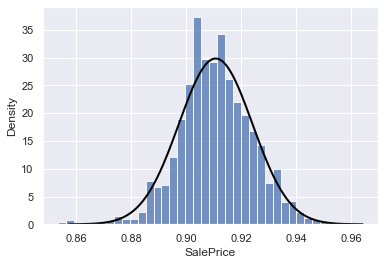

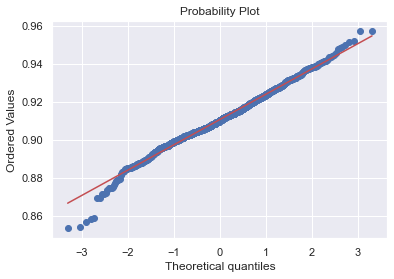

In [50]:
# applying log transformation
train_df['SalePrice'] = np.log(train_df['SalePrice'])
data = train_df['SalePrice']
plot_probability_and_density(data)

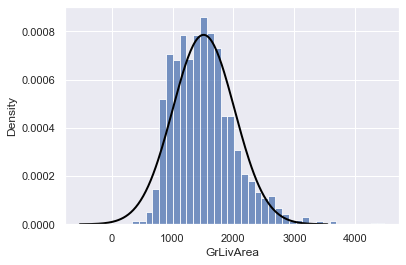

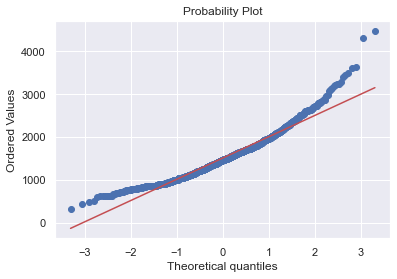

In [51]:
# for "GrLivArea"
data = train_df['GrLivArea']
plot_probability_and_density(data)

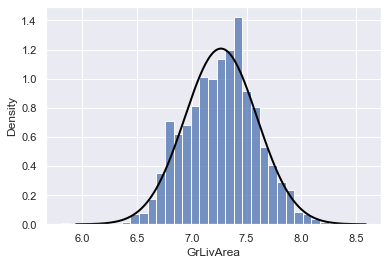

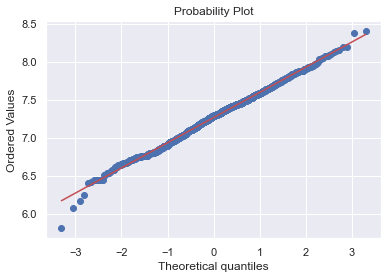

In [52]:
# applying log transformation
train_df['GrLivArea'] = np.log(train_df['GrLivArea'])
data = train_df['GrLivArea']
plot_probability_and_density(data)

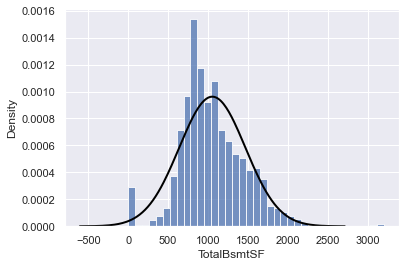

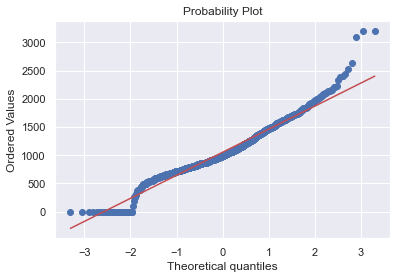

In [60]:
data = train_df['TotalBsmtSF']
plot_probability_and_density(data)

In [61]:
print((train_df['TotalBsmtSF'] == 0).sum())
# cannot use log transform

37


In [64]:
# create column for new variable (one is enough because it's a binary categorical feature)
# if area > 0 it gets 1, for area == 0 it gets 0

train_df['HasBsmt'] = pd.Series(len(train_df['TotalBsmtSF']), index=train_df.index)
train_df['HasBsmt'] = 0 
train_df.loc[train_df['TotalBsmtSF'] > 0 ,'HasBsmt'] = 1

In [65]:
# applying log transformation
train_df.loc[train_df['HasBsmt'] == 1,'TotalBsmtSF'] = np.log(train_df['TotalBsmtSF'])

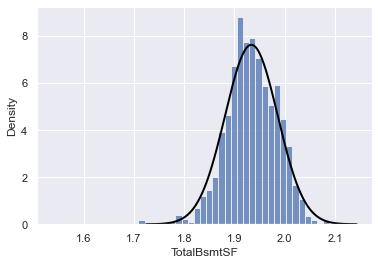

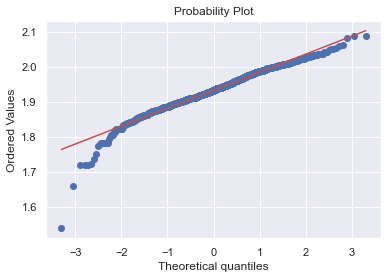

In [66]:
data = train_df[train_df['TotalBsmtSF'] > 0]['TotalBsmtSF']
plot_probability_and_density(data)

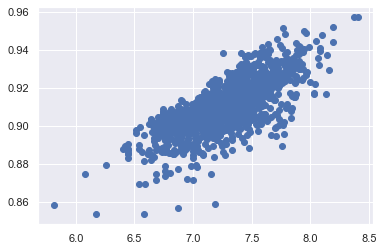

In [70]:
plt.scatter(train_df['GrLivArea'], train_df['SalePrice']);

In [71]:
train_df = pd.get_dummies(train_df)